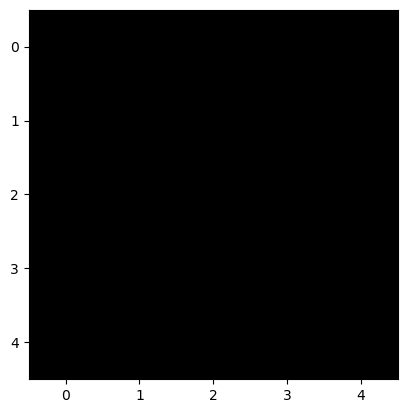

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.random.randint(0,1,(5,5,3)))

In [2]:
# Requires the ele2364 package

import time
import numpy as np
import matplotlib.pyplot as plt

import ele2364
from ele2364 import Memory
from ele2364.environments import Pendulum, FlappyBird, Lander
from ele2364.networks import DQ,V,CQ
from ele2364 import rbfprojector

from train_routines.Active_inference import ActiveInference_trainer
from models.networks import EnsembleModel,RewardModel

In [3]:
# TODO: Create environment
%matplotlib inline
from random import choice
#from tqdm.notebook import trange, tqdm
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from train_routines.Active_inference import ActiveInference_trainer
from models.networks import EnsembleModel,RewardModel
from models.Agents import Planner
from models.utils import Normalizer,Memory_tensors


In [4]:
stat_time_measure,stat_learn_time,stat_test_reward_history,stat_reward_history=[],[],[],[]
stat_reward_error_history,stat_state_error_history=[],[]
for i in range(1):

    WM=EnsembleModel(in_size=4,hidden_size=100,out_size=3,ensemble_size=3,device="cuda")
    RM=RewardModel(in_size=4,hidden_size=100)
    DATA=Memory_tensors(ensemble_size=3,state_dims=3, action_dims=1)

    planner=Planner(
            ensemble=WM,
            reward_model=RM,
            action_size=1,
            ensemble_size=3,
            plan_horizon=30,
            optimisation_iters=5,
            n_candidates=50,
            top_candidates=5,
            batch_size=199,
            learning_rate=1e-3,
            device="cuda"
            )

    random_policy=lambda :np.random.uniform(0,2,(1))
    nor=Normalizer()
    trainer=ActiveInference_trainer(planner,env,DATA,random_policy,nor,100)

    time_measure,learn_time,test_reward_history,reward_history,reward_error_history,state_error_history=trainer.train(3)
    stat_time_measure.append(time_measure)
    stat_learn_time.append(learn_time)
    stat_test_reward_history.append(test_reward_history)
    stat_reward_history.append(reward_history)
    stat_reward_error_history.append(reward_error_history)
    stat_state_error_history.append(state_error_history)

AssertionError: Torch not compiled with CUDA enabled

time to train 100 episodes in mean -82.13851499557495 with standard deviation of 9.162208731573422
algorithm learned to solve pendulum in mean 150.0 with standard deviation of 0.0


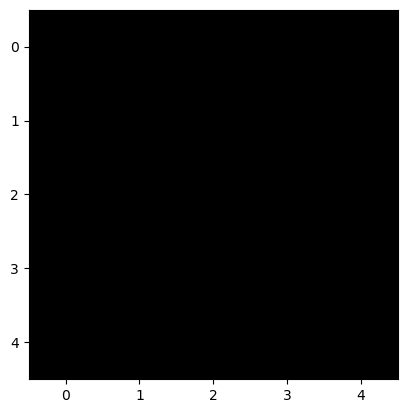

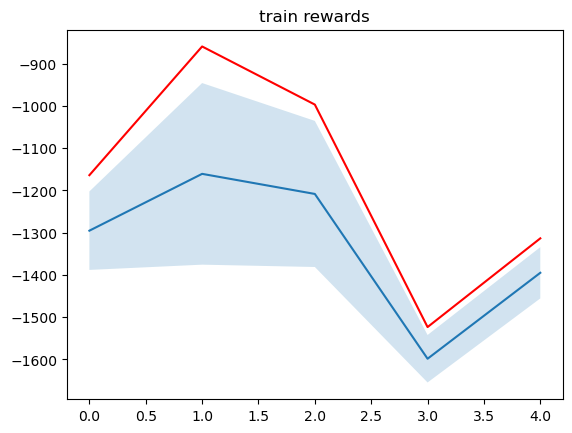

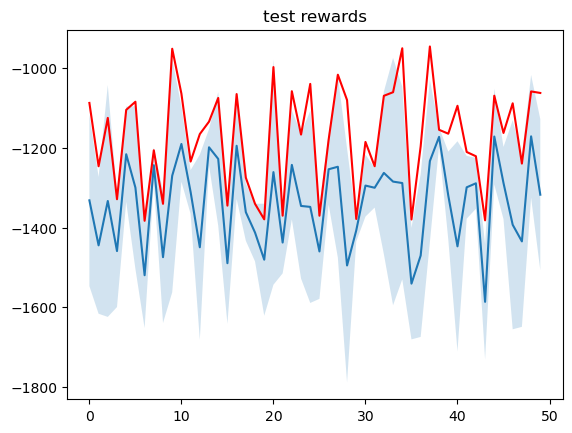

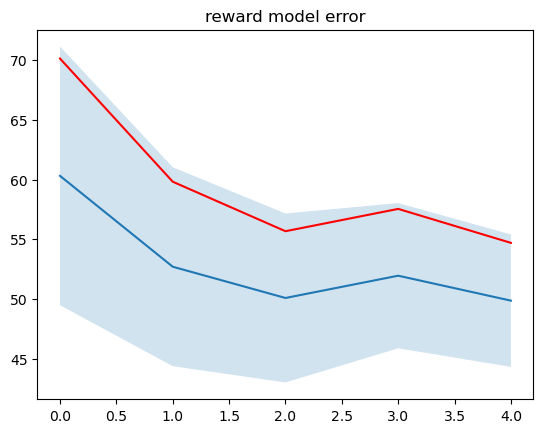

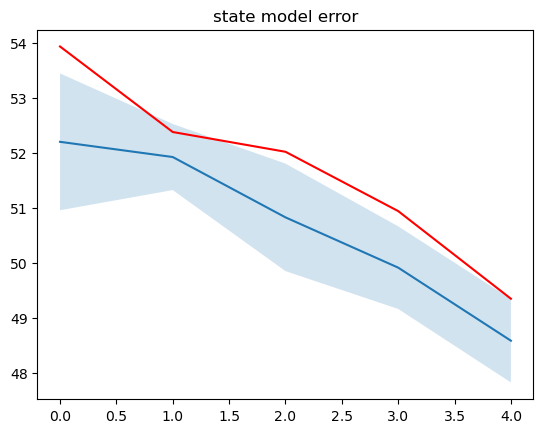

In [10]:
(test_reward_history)

print(f"time to train 100 episodes in mean {np.mean(np.array(stat_time_measure))} with standard deviation of {np.std(np.array(stat_time_measure))}")
print(f"algorithm learned to solve pendulum in mean {np.mean(np.array(stat_learn_time))} with standard deviation of {np.std(np.array(stat_learn_time))}")

r_mean=np.mean(np.array(stat_reward_history),axis=0)
r_std=np.std(np.array(stat_reward_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_reward_history),axis=0))
ax.plot(np.max(np.array(stat_reward_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("train rewards")
plt.show()

r_mean=np.mean(np.array(stat_test_reward_history),axis=0)
r_std=np.std(np.array(stat_test_reward_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_test_reward_history),axis=0))
ax.plot(np.max(np.array(stat_test_reward_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("test rewards")
plt.show()

r_mean=np.mean(np.array(stat_reward_error_history),axis=0)
r_std=np.std(np.array(stat_reward_error_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_reward_error_history),axis=0))
ax.plot(np.max(np.array(stat_reward_error_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("reward model error")
plt.show()

r_mean=np.mean(np.array(stat_state_error_history),axis=0)
r_std=np.std(np.array(stat_state_error_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_state_error_history),axis=0))
ax.plot(np.max(np.array(stat_state_error_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("state model error")
plt.show()

In [ ]:
import gymnasium as gym

stat_time_measure,stat_learn_time,stat_test_reward_history,stat_reward_history=[],[],[],[]
stat_reward_error_history,stat_state_error_history=[],[]

for i in range(5):
    env = gym.make('Acrobot-v1')

    WM=EnsembleModel(in_size=7,hidden_size=100,out_size=6,ensemble_size=3)
    RM=RewardModel(in_size=7,hidden_size=100)
    DATA=Memory_tensors(ensemble_size=3,state_dims=6, action_dims=1)

    planner=Planner(
            ensemble=WM,
            reward_model=RM,
            action_size=1,
            ensemble_size=3,
            plan_horizon=30,
            optimisation_iters=5,
            n_candidates=50,
            top_candidates=5,
            batch_size=199,
            learning_rate=1e-3
            )

    random_policy=lambda :np.random.uniform(0,2,(1))
    nor=Normalizer()
    trainer=ActiveInference_trainer(planner,env,DATA,random_policy,nor,100)

    time_measure,learn_time,test_reward_history,reward_history,reward_error_history,state_error_history=trainer.train(5,5)
    stat_time_measure.append(time_measure)
    stat_learn_time.append(learn_time)
    stat_test_reward_history.append(test_reward_history)
    stat_reward_history.append(reward_history)
    stat_reward_error_history.append(reward_error_history)
    stat_state_error_history.append(state_error_history)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
print(f"time to train 100 episodes in mean {np.mean(np.array(stat_time_measure))} with standard deviation of {np.std(np.array(stat_time_measure))}")
print(f"algorithm learned to solve pendulum in mean {np.mean(np.array(stat_learn_time))} with standard deviation of {np.std(np.array(stat_learn_time))}")

r_mean=np.mean(np.array(stat_reward_history),axis=0)
r_std=np.std(np.array(stat_reward_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_reward_history),axis=0))
ax.plot(np.max(np.array(stat_reward_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("train rewards")
plt.show()

r_mean=np.mean(np.array(stat_test_reward_history),axis=0)
r_std=np.std(np.array(stat_test_reward_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_test_reward_history),axis=0))
ax.plot(np.max(np.array(stat_test_reward_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("test rewards")
plt.show()

r_mean=np.mean(np.array(stat_reward_error_history),axis=0)
r_std=np.std(np.array(stat_reward_error_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_reward_error_history),axis=0))
ax.plot(np.max(np.array(stat_reward_error_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("reward model error")
plt.show()

r_mean=np.mean(np.array(stat_state_error_history),axis=0)
r_std=np.std(np.array(stat_state_error_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_state_error_history),axis=0))
ax.plot(np.max(np.array(stat_state_error_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("state model error")
plt.show()